<a href="https://colab.research.google.com/github/newton-raphson/predictive-maintenance-fuseai/blob/main/Predictive_Mainte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "drive/MyDrive/Fuse AI/"

In [ ]:
!ls

drive  sample_data


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
data= pd.read_csv(path+'predictive_maintenance.csv',delimiter=',')

In [ ]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


UDI, PRODUCT ID DOESN'T PROVIDE PROPER INFO

In [ ]:
data.drop("Product ID", axis = 1, inplace = True)

In [ ]:
data.drop("UDI", axis = 1, inplace = True)

In [ ]:
data.drop("Failure Type", axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


TYPE IS L,M,H is changed to 0,1,2

In [ ]:
# Define the mapping dictionary
mapping = {'L': 0, 'M': 1, 'H': 2}

# Map the values in the DataFrame column
data['Type'] = data['Type'].map(mapping)

In [ ]:
data.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500300,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,0.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,0.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,1.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,2.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
# Number of failures 
data.Target.value_counts()[1]/data.Target.count()*100
# Moderate	1-20% of the data set
# from https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data 

3.39

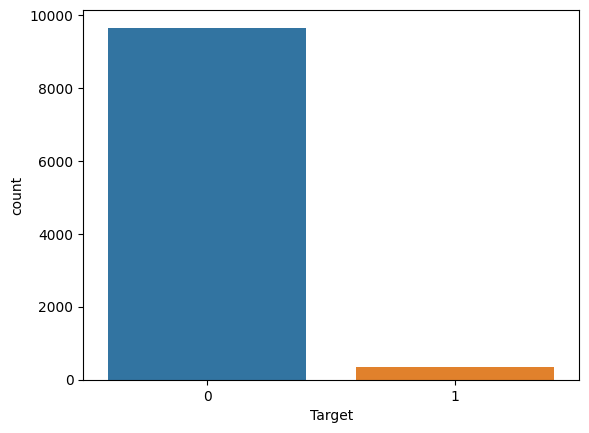

In [ ]:
import seaborn as sns
ax = sns.countplot(x = "Target", data = data)
# the data is highly imbalanced

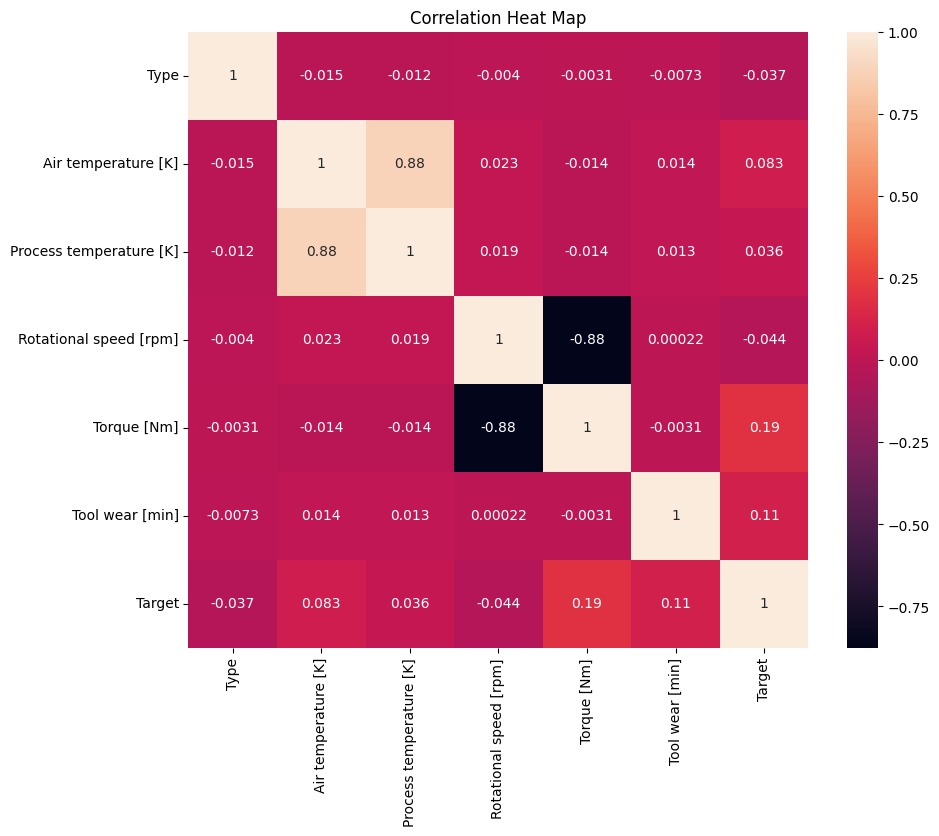

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
plt.title("Correlation Heat Map")
sns.heatmap(data.corr(), annot=True)
plt.show()


The heatmap shows that the Torque and Tool wear have very high correlation. Air and Process Temperature have high correlation as well

Text(0.5, 0, 'Torque')

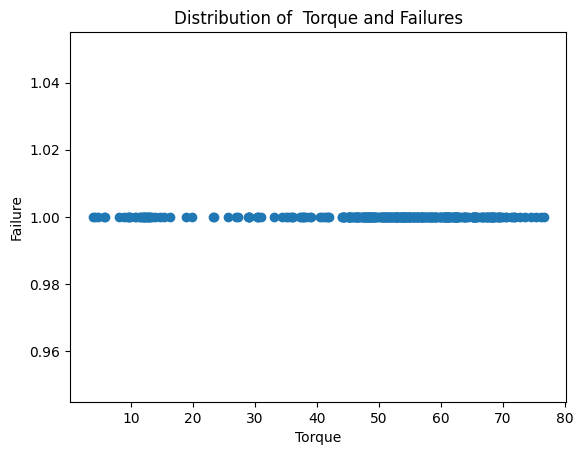

In [ ]:
#Failure rate Vs days from installation 
Failure = data[data.Target==1]

# Failure.Target.value_counts().plot(kind='barh')
plt.plot(Failure["Torque [Nm]"],Failure.Target,'o')
plt.title("Distribution of  Torque and Failures")
plt.ylabel("Failure")
plt.xlabel("Torque")



Text(0.5, 0, 'Tool wear [min]')

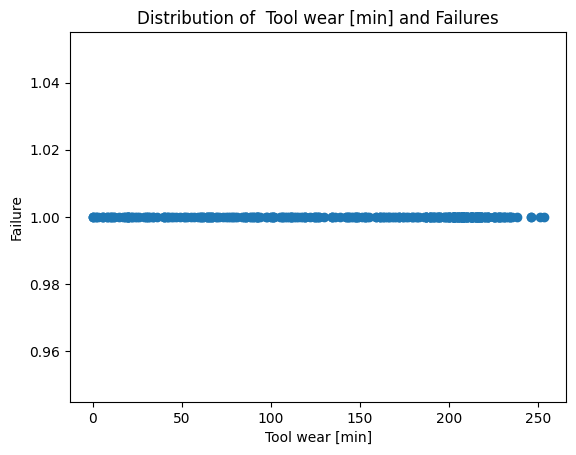

In [ ]:
plt.plot(Failure["Tool wear [min]"],Failure.Target,'o')
plt.title("Distribution of  Tool wear [min] and Failures")
plt.ylabel("Failure")
plt.xlabel("Tool wear [min]")

Text(0, 0.5, 'Process temperature [K]')

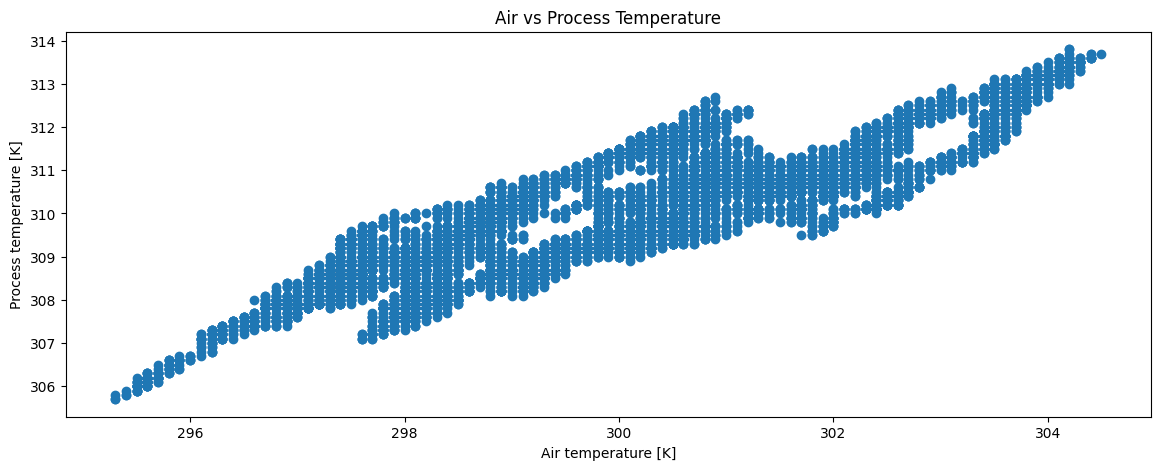

In [ ]:
fig = plt.figure(figsize = (14,5))
plt.plot(data["Air temperature [K]"],data["Process temperature [K]"],'o')
plt.title("Air vs Process Temperature")
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')

Text(0, 0.5, 'Torque [Nm]')

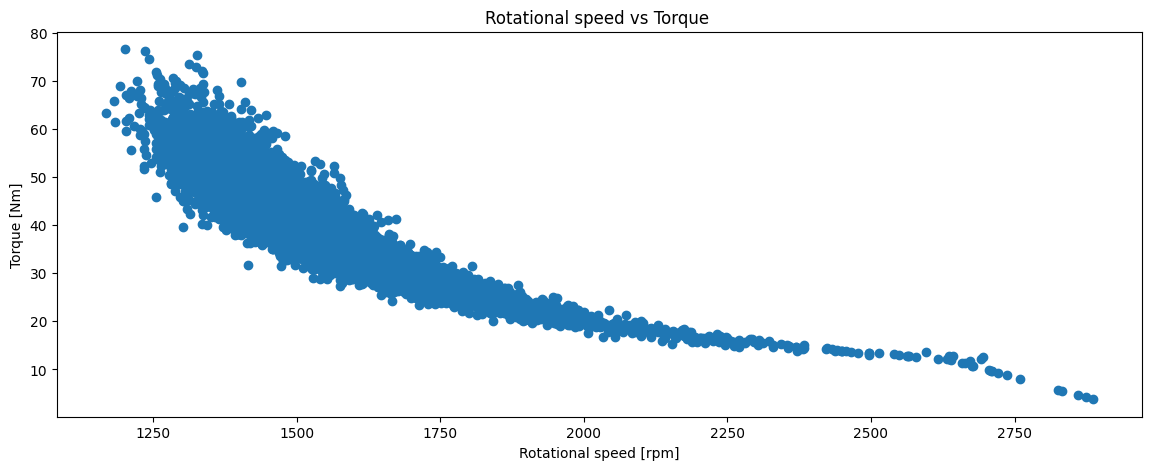

In [ ]:
fig = plt.figure(figsize = (14,5))
plt.plot(data["Rotational speed [rpm]"],data["Torque [Nm]"],'o')
plt.title("Rotational speed vs Torque ")
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')

In [ ]:
column_names = list(data.columns)
column_names

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

**Histogram of Original Data without Scaling**

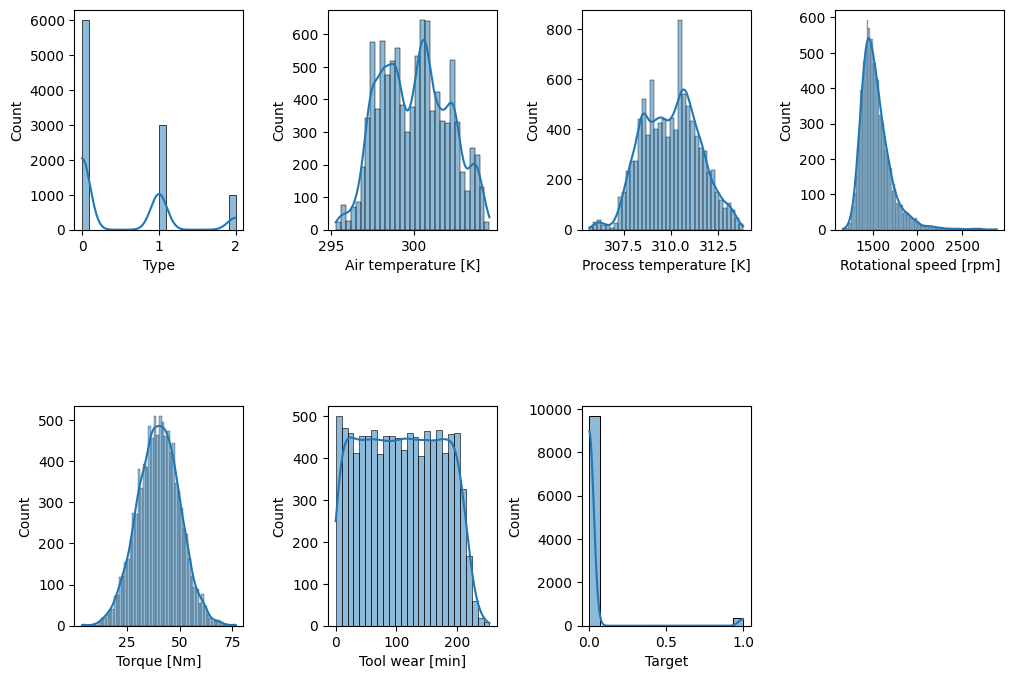

In [ ]:

NUM_ROWS = 2
NUM_COLS = 4
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace=0.5, hspace=0.8)


for row in range(NUM_ROWS):
    for col in range(NUM_COLS):
        ax = axs[row][col]
        if NUM_COLS * row + col < len(column_names):
            sns.histplot(data[column_names[NUM_COLS * row + col]], ax=ax, kde=True)
        else:
            ax.axis('off')
plt.show()


**Box Plots of Original Data**

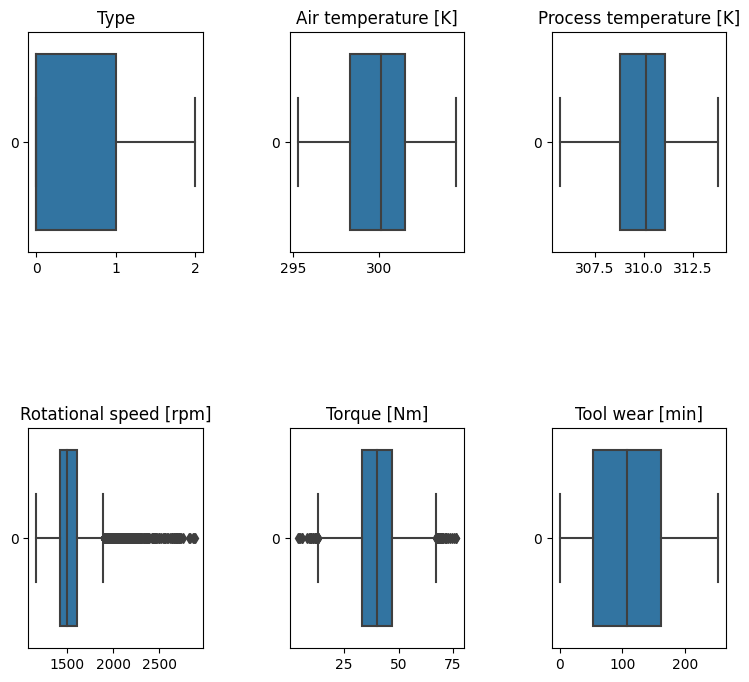

In [ ]:
NUM_ROWS = 2
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(9, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.boxplot(data[column_names[NUM_COLS * row + col]], ax = ax, orient = "h")
    ax.set_title(column_names[NUM_COLS * row + col])
plt.show()

In [ ]:

# fig = plt.figure(figsize = (30,15))
# plt.subplot2grid((1,2),(0,0))
# #Failure vs Attribute1
# Failure.Type.value_counts().plot(kind='barh')
# plt.title("Distribution of Failure according to Type")
# plt.xlabel("Failures")
# plt.ylabel("Type")

# plt.subplot2grid((1,2),(0,1))
# cnt = Failure["Process temperature [K]"]
# cnt
# maxi = cnt.max()
# mini = cnt.min()

# bin=np.linspace(mini, maxi, 5)
# bin
# sns.histplot(Failure.Type, ax=ax, kde=True)
# Convert the 'data' column into intervals and get the frequency count
# interval_counts = pd.cut(cnt, bin).value_counts() 
# interval_counts.plot(kind='barh')

# bins = np.max()
# plt.title("Distribution of Failure according to Process temperature [K]")
# plt.xlabel("Failure")
# plt.ylabel("Process temperature [K]")

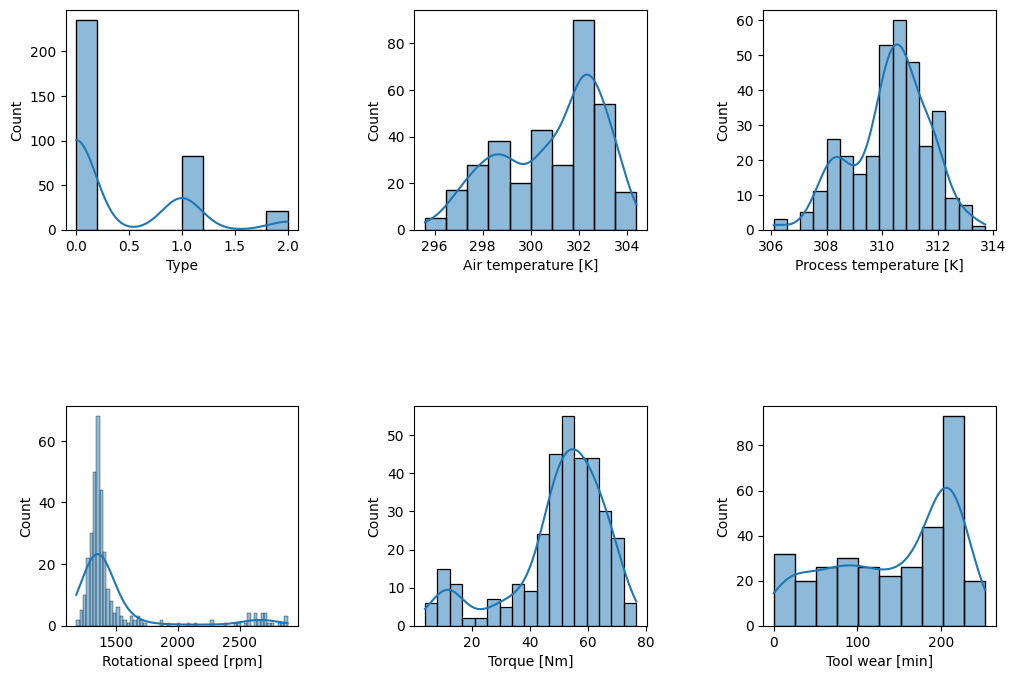

In [ ]:
NUM_ROWS = 2
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace=0.5, hspace=0.8)


for row in range(NUM_ROWS):
    for col in range(NUM_COLS):
        ax = axs[row][col]
        if NUM_COLS * row + col < len(column_names):
            sns.histplot(Failure[column_names[NUM_COLS * row + col]], ax=ax, kde=True)
        else:
            ax.axis('off')


plt.show()


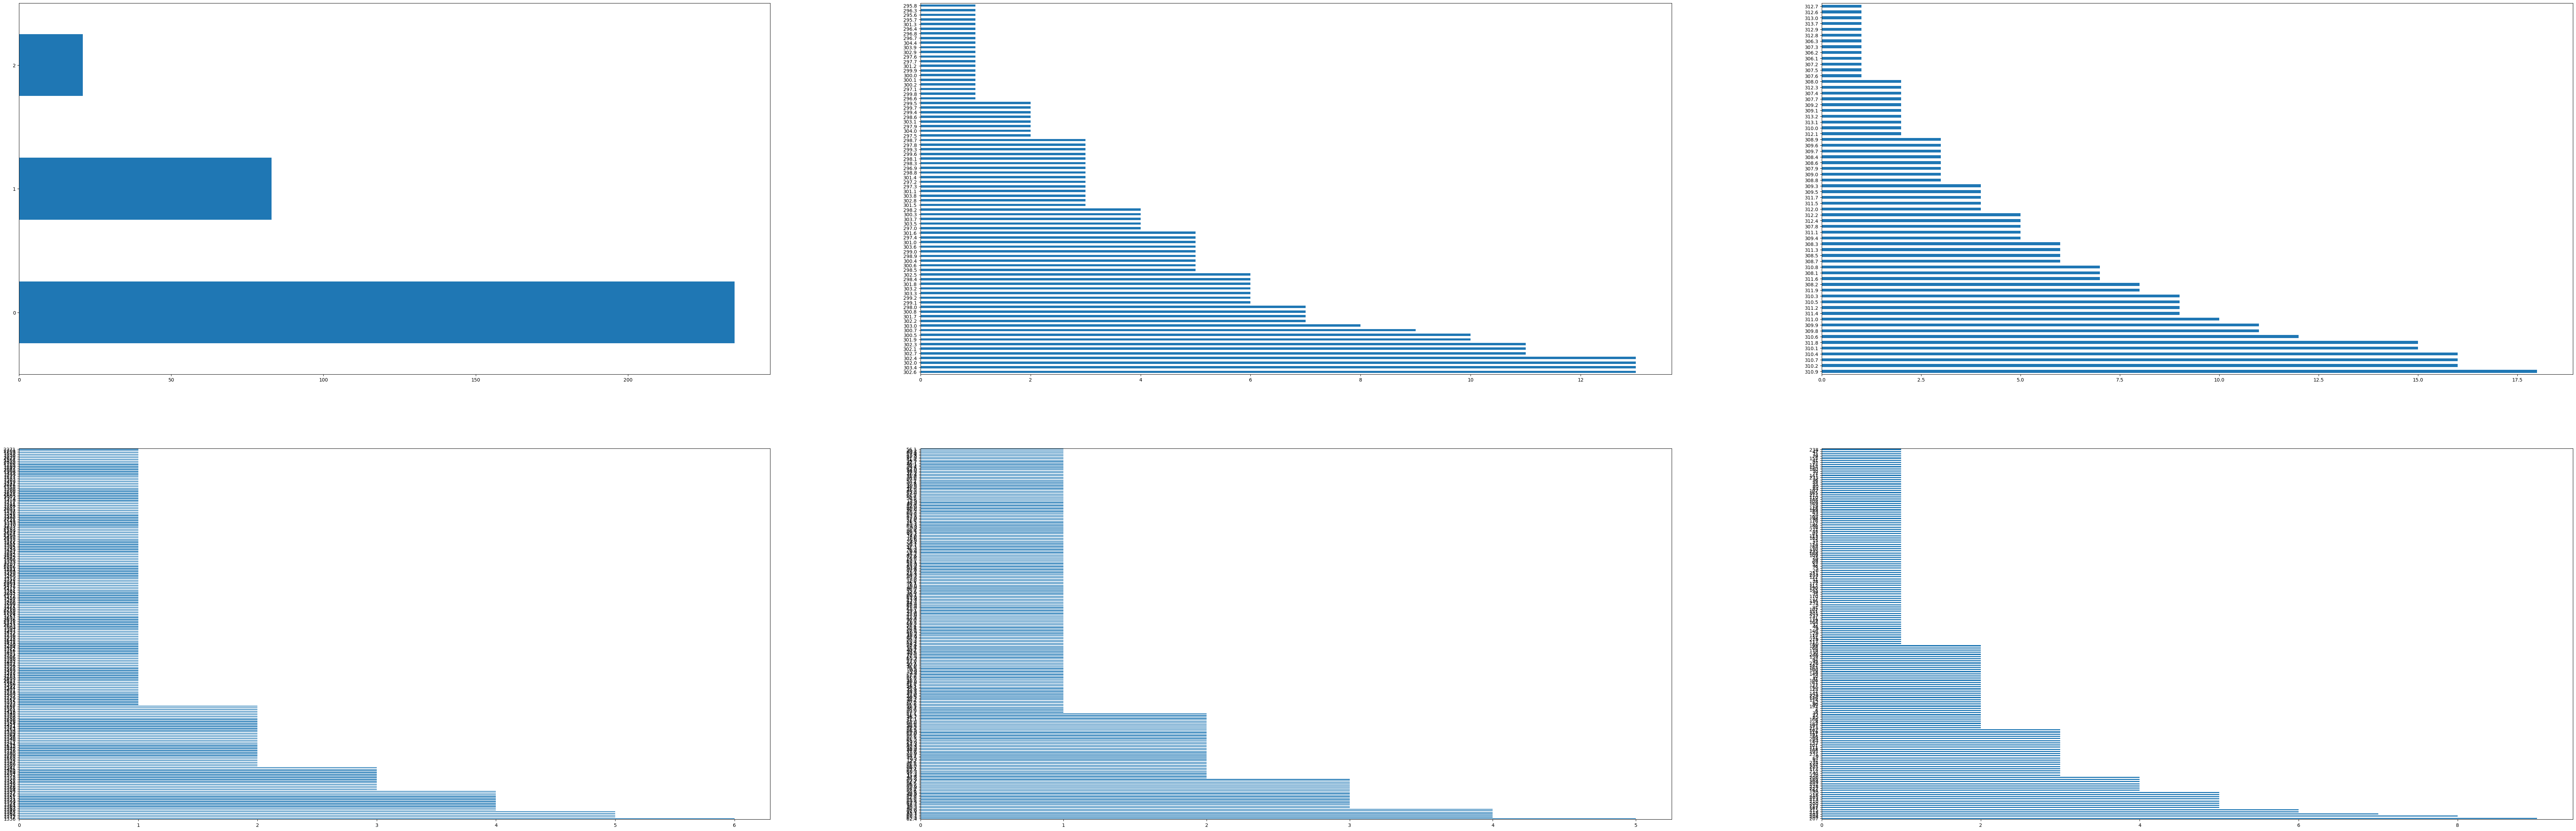

In [ ]:
Rows=1
Col =6

fig = plt.figure(figsize = (500,500))
for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    plt.subplot2grid((30,15),(row,col))
    Failure[column_names[NUM_COLS * row + col]].value_counts().plot(kind='barh')
# plt.subplot2grid((1,2),(0,0))
# #Failure vs Attribute1
# Failure.Type.value_counts().plot(kind='barh')
# plt.title("Distribution of Failure according to attribute1")
# plt.xlabel("Failures")
# plt.ylabel("Type")

# plt.subplot2grid((1,2),(0,1))
# Failure["Process temperature [K]"].value_counts().plot(kind='barh')
# plt.title("Distribution of Failure according to attribute2")
# plt.xlabel("Failure")
# plt.ylabel("Attribute9")

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data)
scaler2= StandardScaler()
scaler2.fit(data)

StandardScaler()

In [ ]:
min_max_data = scaler.transform(data)
std_data = scaler2.transform(data)

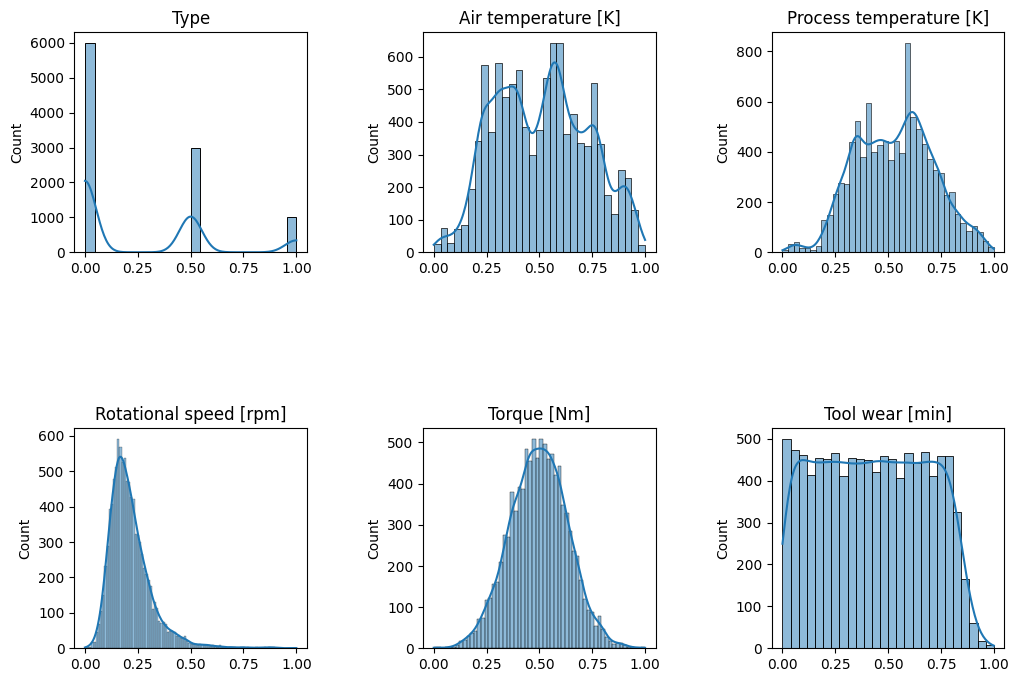

In [ ]:
NUM_ROWS = 2
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.histplot(min_max_data[:, NUM_COLS * row + col], ax = ax, kde = True)
    ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

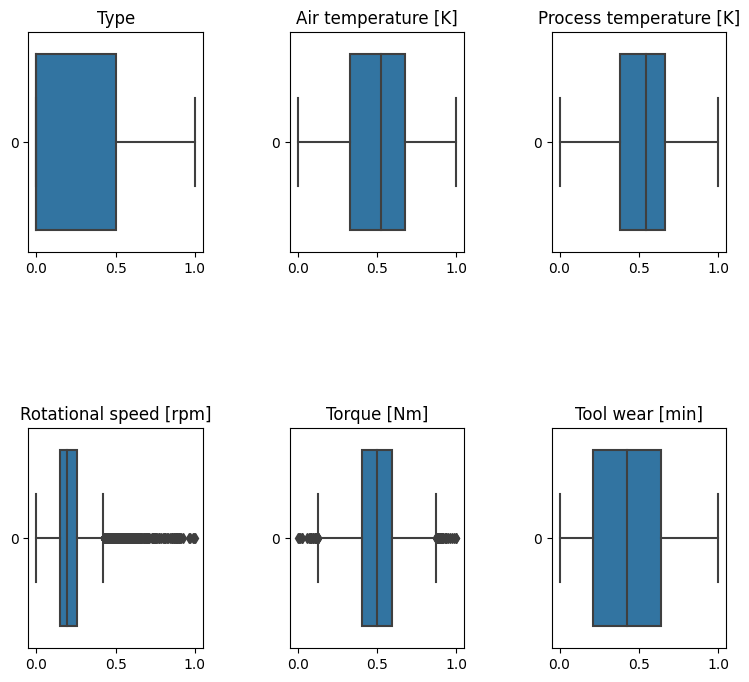

In [ ]:
NUM_ROWS = 2
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(9, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.boxplot(min_max_data[:, NUM_COLS * row + col], ax = ax, orient = "h")
    ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

In [ ]:
log_min_max = np.log(min_max_data+0.00001)

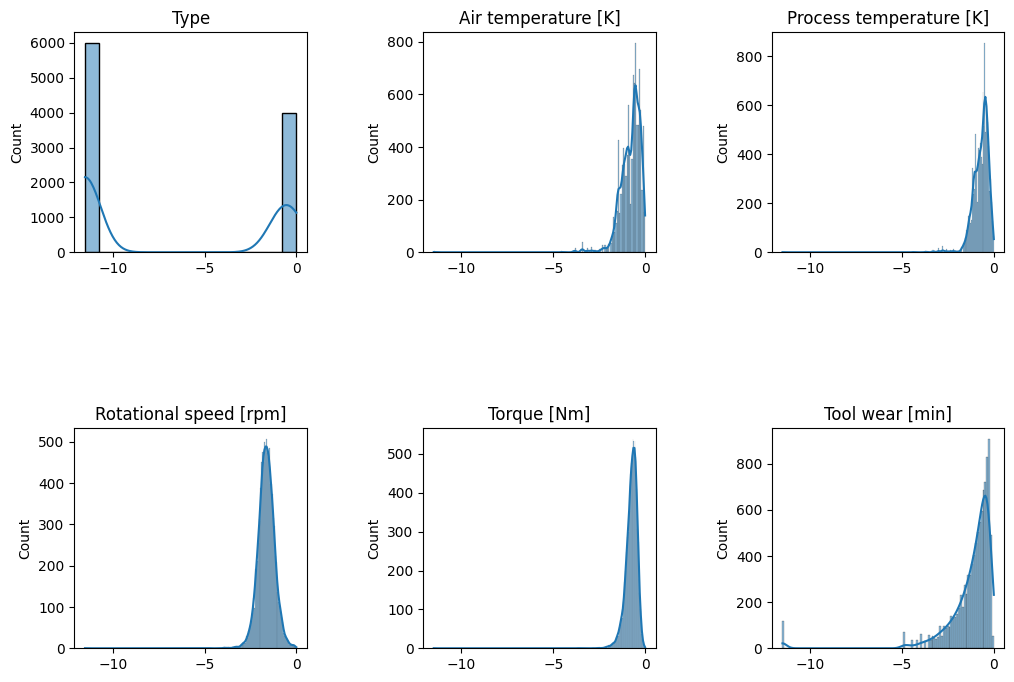

In [ ]:
NUM_ROWS = 2
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.histplot(log_min_max[:, NUM_COLS * row + col], ax = ax, kde = True)
    ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

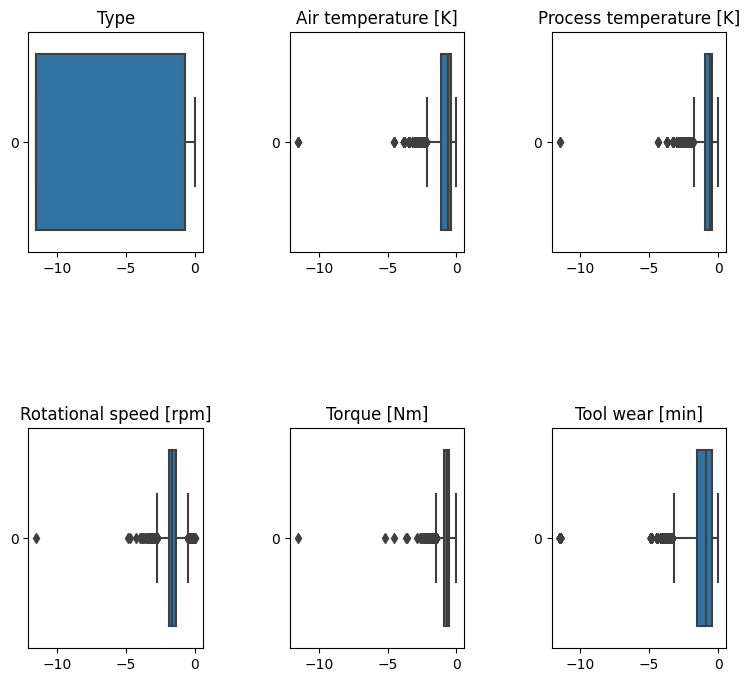

In [ ]:
NUM_ROWS = 2
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(9, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.boxplot(log_min_max[:, NUM_COLS * row + col], ax = ax, orient = "h")
    ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

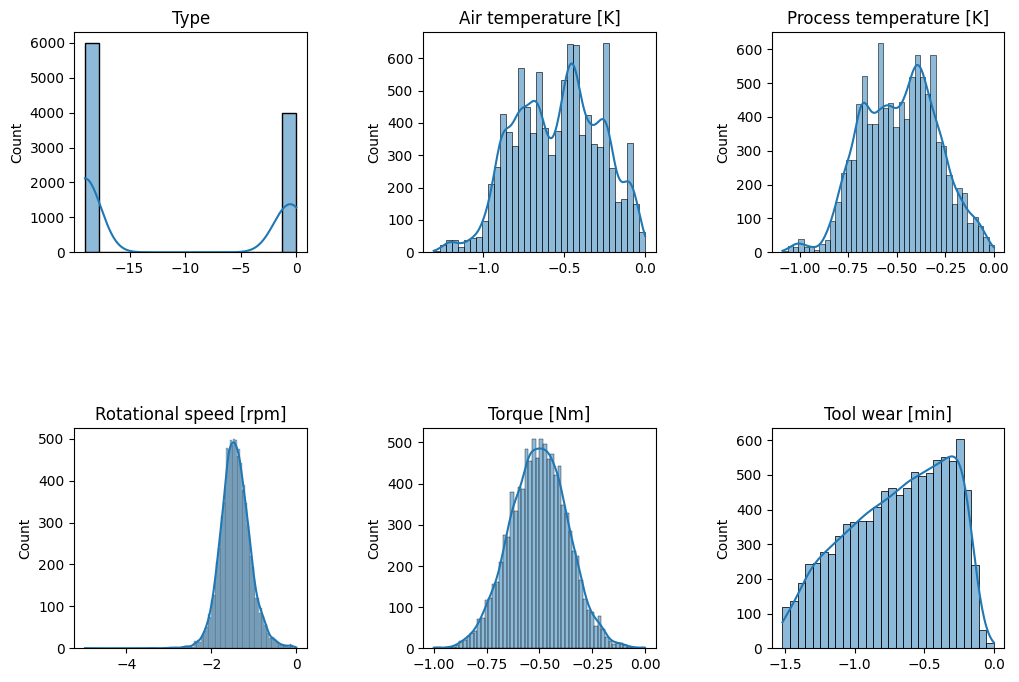

In [ ]:
from scipy import stats

NUM_ROWS = 2
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(12, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    plt_data = min_max_data[:, NUM_COLS * row + col]
    data_bc, _ = stats.boxcox(plt_data + 0.0001)
    
    ax = axs[row][col]
    sns.histplot(data_bc, ax = ax, kde = True)
    ax.set_title(column_names[NUM_COLS * row + col])

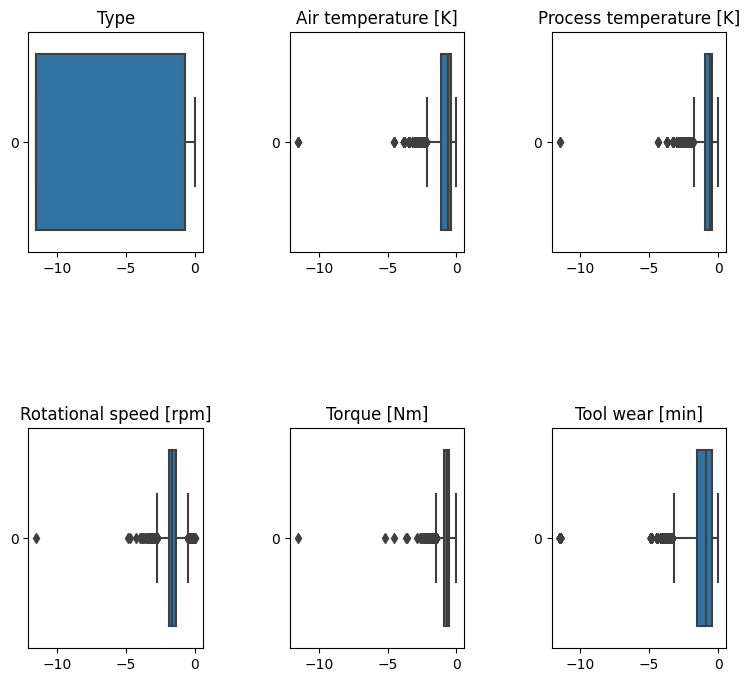

In [ ]:
NUM_ROWS = 2
NUM_COLS = 3
fig, axs = plt.subplots(NUM_ROWS, NUM_COLS)
fig.set_size_inches(9, 8)
fig.subplots_adjust(wspace = 0.5, hspace = 0.8)

for row in range(NUM_ROWS):
  for col in range(NUM_COLS):
    ax = axs[row][col]
    sns.boxplot(log_min_max[:, NUM_COLS * row + col], ax = ax, orient = "h")
    ax.set_title(column_names[NUM_COLS * row + col])

plt.show()

In [ ]:
sns.pairplot(data = data)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop("Target", axis = 1)
y = data.Target

RANDOM_STATE=23

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify = y)
train_df = pd.concat([X_train, y_train], axis = 1)
train_df.to_csv(path + 'train_df.csv')
test_df = pd.concat([X_test, y_test], axis = 1)  
test_df.head()
test_df.to_csv(path + "test_df.csv")

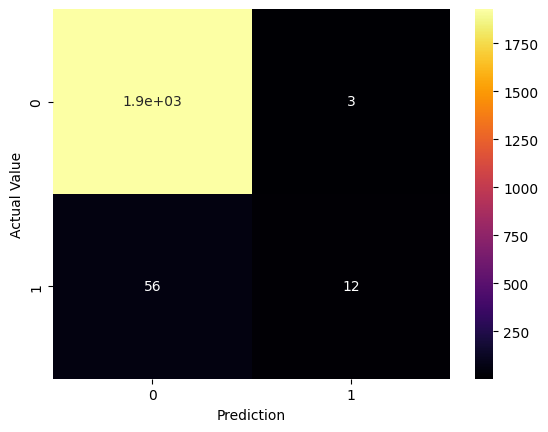


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.80      0.18      0.29        68

    accuracy                           0.97      2000
   macro avg       0.89      0.59      0.64      2000
weighted avg       0.97      0.97      0.96      2000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

logreg = LogisticRegression(random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In the problem of predictive maintenance Recall of 1 is very crucial as we need to be able to maintain the part if there is slight hint or chances of failure

In [ ]:
# using min_max_scaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

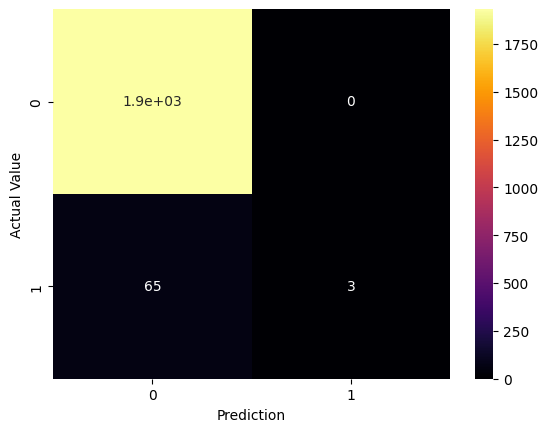


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       1.00      0.04      0.08        68

    accuracy                           0.97      2000
   macro avg       0.98      0.52      0.53      2000
weighted avg       0.97      0.97      0.95      2000



In [ ]:
logreg = LogisticRegression(random_state=RANDOM_STATE)
logreg.fit(scaler.transform(X_train), y_train)

y_pred = logreg.predict(scaler.transform(X_test))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

***Recall Decreases***

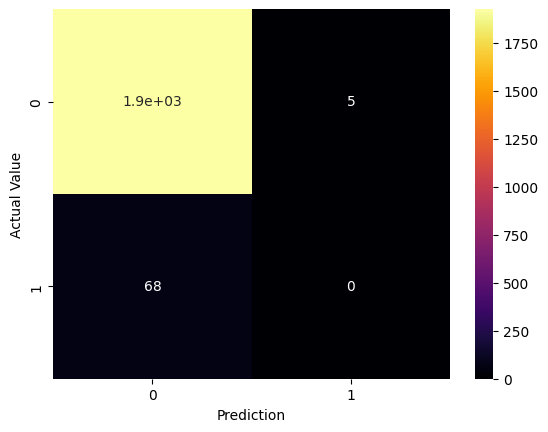


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.00      0.00      0.00        68

    accuracy                           0.96      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.96      0.95      2000



In [ ]:
# using min_max_scaler with log transform
logreg = LogisticRegression(random_state=RANDOM_STATE)
logreg.fit(np.log(scaler.transform(X_train)+0.00001), y_train)

y_pred = logreg.predict(np.log(scaler.transform(X_test)+0.00001))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

***Recall Decreases***

**HANDLING IMBALANCED CLASS**

In [ ]:
y_train.value_counts()

0    7729
1     271
Name: Target, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = RANDOM_STATE)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
y_res.value_counts()

0    7729
1    7729
Name: Target, dtype: int64

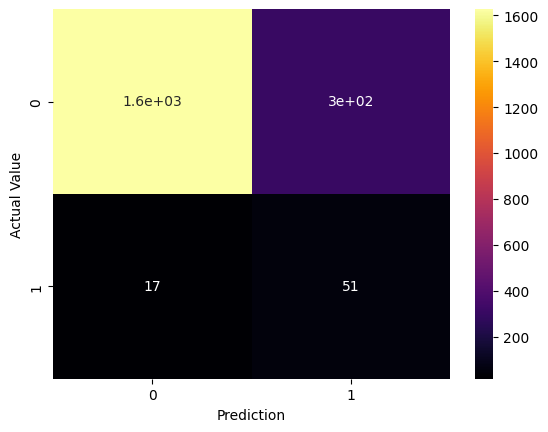


              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1932
           1       0.14      0.75      0.24        68

    accuracy                           0.84      2000
   macro avg       0.57      0.80      0.58      2000
weighted avg       0.96      0.84      0.89      2000



In [ ]:
logreg = LogisticRegression(random_state=RANDOM_STATE)
logreg.fit(X_res, y_res)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

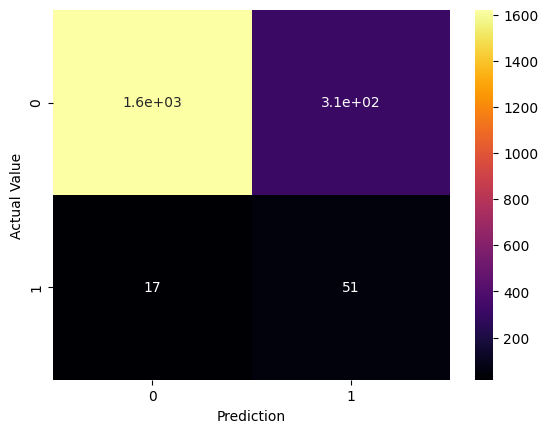


              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1932
           1       0.14      0.75      0.24        68

    accuracy                           0.84      2000
   macro avg       0.57      0.79      0.57      2000
weighted avg       0.96      0.84      0.89      2000



In [ ]:
logreg = LogisticRegression(random_state=RANDOM_STATE)
logreg.fit(scaler.transform(X_res), y_res)

y_pred = logreg.predict(scaler.transform(X_test))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

***Recall Increases but precision is very low as well***

In [ ]:
from sklearn.metrics import recall_score

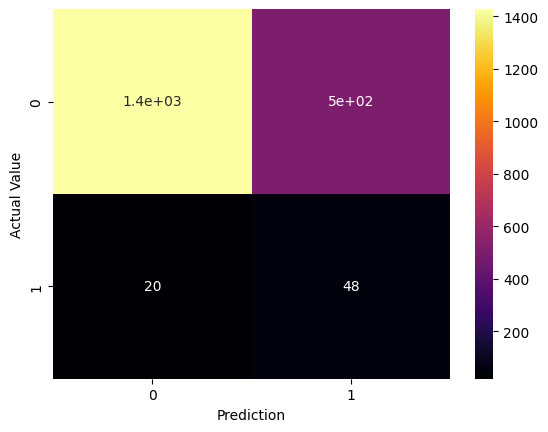

0.7058823529411765
              precision    recall  f1-score   support

           0       0.99      0.74      0.84      1932
           1       0.09      0.71      0.15        68

    accuracy                           0.74      2000
   macro avg       0.54      0.72      0.50      2000
weighted avg       0.96      0.74      0.82      2000



In [ ]:
# using min_max_scaler with log transform
logreg = LogisticRegression(random_state=RANDOM_STATE)
logreg.fit(np.log(scaler.transform(X_res)+0.00001), y_res)

y_pred = logreg.predict(np.log(scaler.transform(X_test)+0.00001))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print(recall_score(y_test,y_pred))
print(classification_report(y_true = y_test, y_pred = y_pred))

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,recall_score, precision_score, accuracy_score, classification_report


In [ ]:
def compare_accurracy(model_list, model_labels, X_test, y_test):
    fig,ax1 = plt.subplots(figsize = (8,5))
    acc = []
    
    for model in model_list:
        pred = model.predict(X_test)
        pred_prob = model.predict_proba(X_test)[:,1]
        acc.append(np.round(accuracy_score(y_test, pred), 2))
    legend = []
    for i in range(len(model_list)):
        legend.append(f'{model_labels[i]}:{acc[i]}')
    scores_df = pd.DataFrame({'Models': model_labels, 'Accurracy': acc})
    scores_df.sort_values(by = 'Accurracy', inplace =True, ascending = False)
    sns.barplot(scores_df, x = 'Accurracy', y = 'Models', orient = 'h', ax = ax1, width = 0.5)
    ax1.set_title('Comparison of Classification Models')
    ax1.set_xticks(list(scores_df['Accurracy']))
    ax1.grid()
    return scores_df

In [ ]:
def compare_recall(model_list, model_labels, X_test, y_test):
    fig,ax1 = plt.subplots(figsize = (8,5))
    rec = []
    
    for model in model_list:
        pred = model.predict(X_test)
        pred_prob = model.predict_proba(X_test)[:,1]
        rec.append(np.round(recall_score(y_test, pred), 2))
    legend = []
    for i in range(len(model_list)):
        legend.append(f'{model_labels[i]}:{rec[i]}')
    scores_df = pd.DataFrame({'Models': model_labels, 'Recall': rec})
    scores_df.sort_values(by = 'Recall', inplace =True, ascending = False)
    sns.barplot(scores_df, x = 'Recall', y = 'Models', orient = 'h', ax = ax1, width = 0.5)
    ax1.set_title('Comparison of Classification Models')
    ax1.set_xticks(list(scores_df['Recall']))
    ax1.grid()
    return scores_df

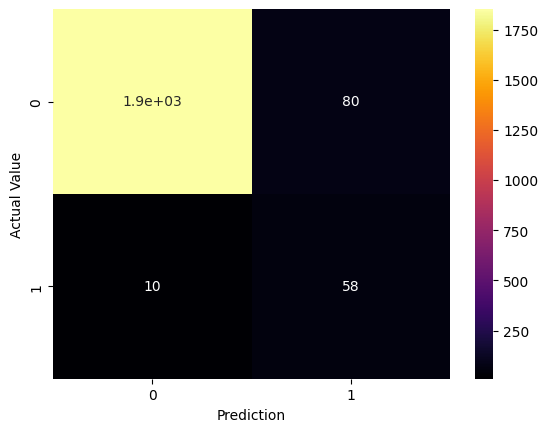


              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1932
           1       0.42      0.85      0.56        68

    accuracy                           0.95      2000
   macro avg       0.71      0.91      0.77      2000
weighted avg       0.98      0.95      0.96      2000



In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(np.log(scaler.transform(X_res)+0.00001), y_res)

y_pred = rf_model.predict(np.log(scaler.transform(X_test)+0.00001))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [ ]:
# Better with just scaler transform
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(scaler.transform(X_res), y_res)

y_pred = rf_model.predict(scaler.transform(X_test))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [ ]:
import numpy as np


In [ ]:
X_train_scaled=scaler.transform(X_res)

In [ ]:
svc_model = SVC(probability = True)
svc_model.fit(X_train_scaled, y_res)
svc_model.get_params()

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_res)

In [ ]:
model_list = [rf_model, svc_model, knn_model]
model_labels = ['Random Forest', 'Support Vector', 'KNN']

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
scores = compare_accurracy(model_list, model_labels, X_test_scaled, y_test)

In [ ]:
scores

In [ ]:
scores = compare_recall(model_list, model_labels, X_test_scaled, y_test)

In [ ]:
scores

**HYPER PARAMETER TUNING FOR RF**

---



In [ ]:
X_train_scaled=scaler.transform(X_res)

In [ ]:
rf_params = {
    'n_estimators': [10, 50, 100, 200,250],
    'max_depth': [None, 10, 20,],
    'min_samples_split': [2, 5,],
    'min_samples_leaf': [1, 2, ],
}


In [ ]:
%%time
rf_grid = GridSearchCV(estimator = rf_model, param_grid = rf_params, cv = 5, n_jobs = -1)
rf_grid.fit(X_train_scaled, y_res)
print("Best RandomForest model: ", rf_grid.best_estimator_)
print("Best set of hyperparameters: ", rf_grid.best_params_)
print("Best score: ", rf_grid.best_score_)

Best RandomForest model:  RandomForestClassifier(n_estimators=250)
Best set of hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best score:  0.9759997204252382
CPU times: user 8.15 s, sys: 447 ms, total: 8.59 s
Wall time: 8min 6s


In [ ]:
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(X_train_scaled, y_res)

RandomForestClassifier(n_estimators=250)

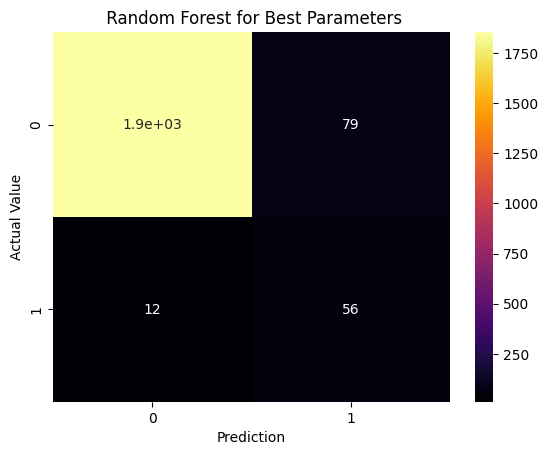


              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1932
           1       0.41      0.82      0.55        68

    accuracy                           0.95      2000
   macro avg       0.70      0.89      0.76      2000
weighted avg       0.97      0.95      0.96      2000



In [ ]:
y_pred = best_rf_model.predict(X_test_scaled)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.title(" Random Forest for Best Parameters")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

**Boosting(Ada, Gradient and XGB)**

In [ ]:
from xgboost import XGBClassifier

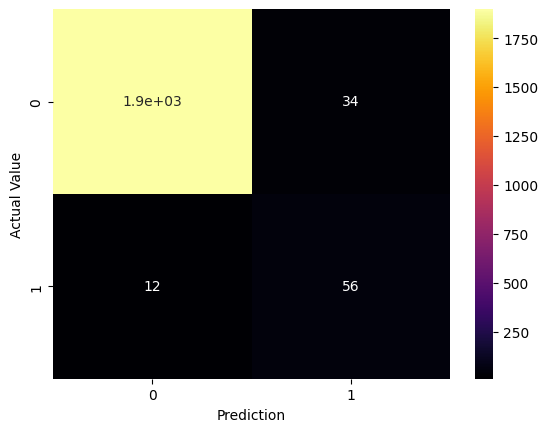


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.62      0.82      0.71        68

    accuracy                           0.98      2000
   macro avg       0.81      0.90      0.85      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
xgbv1 = XGBClassifier()
xgbv1.fit(X_train_scaled, y_res)

y_pred = xgbv1.predict(X_test_scaled)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [ ]:
xgbv1.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
import scipy.stats as stats

param_dict = {
    'max_depth': stats.randint(0, 17),
    'learning_rate': [0.09,None,0.095],
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

xgbv1_model = XGBClassifier()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    

Best set of hyperparameters:  {'learning_rate': None, 'max_depth': 7, 'n_estimators': 191, 'subsample': 0.9886610918271799}
Best score:  0.9932724600911843


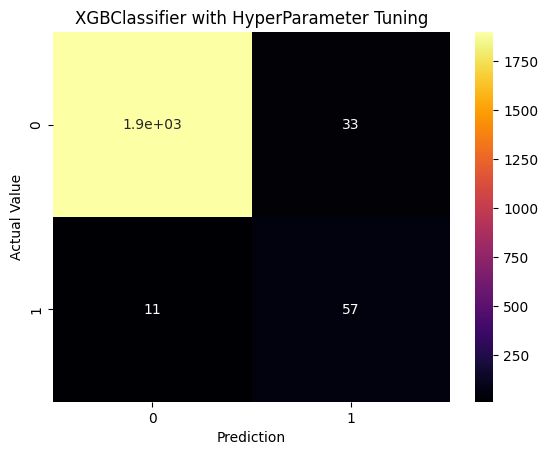


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.63      0.84      0.72        68

    accuracy                           0.98      2000
   macro avg       0.81      0.91      0.86      2000
weighted avg       0.98      0.98      0.98      2000




In [ ]:
random_search = RandomizedSearchCV(xgbv1_model, param_distributions = param_dict, n_iter = 10, cv = 5, scoring='recall')

random_search.fit(X_train_scaled, y_res)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

y_pred = random_search.predict(X_test_scaled)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.title("XGBClassifier with HyperParameter Tuning")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

print()

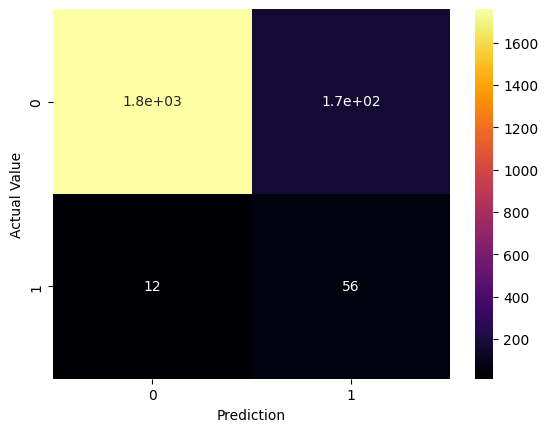


              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1932
           1       0.24      0.82      0.38        68

    accuracy                           0.91      2000
   macro avg       0.62      0.87      0.66      2000
weighted avg       0.97      0.91      0.93      2000



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_res) 

y_pred = ada.predict(X_test_scaled)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

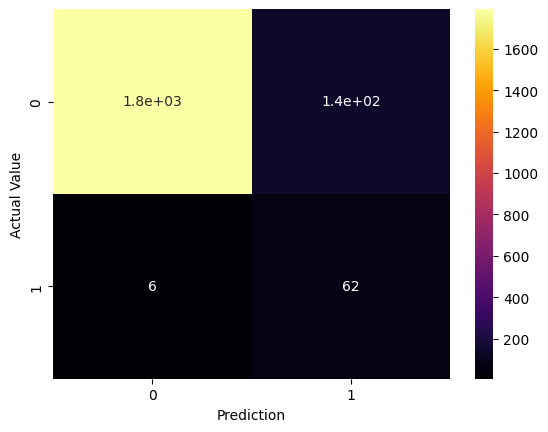


              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1932
           1       0.31      0.91      0.46        68

    accuracy                           0.93      2000
   macro avg       0.65      0.92      0.71      2000
weighted avg       0.97      0.93      0.94      2000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_res) 

y_pred = gbc.predict(X_test_scaled)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [ ]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_dict = {
    'max_depth': stats.randint(1, 10),
    'learning_rate': [0.09,0.1,0.095],
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':[50,100,200]
}

gbc = GradientBoostingClassifier()
random_search = RandomizedSearchCV(gbc, param_distributions = param_dict, n_iter = 10, cv = 5, scoring='recall')

random_search.fit(X_train_scaled, y_res)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

y_pred = random_search.predict(X_test_scaled)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.title("GradientBoostingClassifier with HyperParameter Tuning")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

print()